In [12]:
from eval import eval
import json
import pickle
import seaborn as sb
from scipy.stats import pearsonr
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

In [2]:
### load general data
relevance_scores = eval.load_rel_scores('data_2017-09/queries/relevance_scores.txt')
url_file_map = pickle.load(open('data_2017-09/url_file_map.pkl', 'rb'))
file_url_map = {url_file_map[url]['filename']: url for url in url_file_map}

In [3]:
### load run-specific data

queries_full = eval.load_query_ids('data_2017-09/queries/queries_val.tsv')

# full
bm25_full = eval.load_run('out/bm25_runs/v2_run.val_8_0.99.txt')
bm25_full_mrr = eval.compute_mrr10(relevance_scores, bm25_full, queries_full, raw=True)
bm25_full_p = eval.compute_p1(relevance_scores, bm25_full, queries_full, raw=True)

bm25rm3_full = eval.load_run('out/bm25rm3_runs/v2_run.val_8_0.99_0.9_1_10.txt')
bm25rm3_full_mrr = eval.compute_mrr10(relevance_scores, bm25rm3_full, queries_full, raw=True)
bm25rm3_full_p = eval.compute_p1(relevance_scores, bm25rm3_full, queries_full, raw=True)


semantic_full = eval.load_run('out/semantic_runs/v2_run.val_full_msmarco-distilbert-cos-v5.txt')
semantic_full_mrr = eval.compute_mrr10(relevance_scores, semantic_full, queries_full, raw=True)
semantic_full_p = eval.compute_p1(relevance_scores, semantic_full, queries_full, raw=True)


semantic_finetune_full = eval.load_run('out/semantic_finetune_runs/train_bi-encoder-mnrl-msmarco-distilbert-cos-v5-queries-2022-06-01_12-04-50/eval/run.val_full.txt')
semantic_finetune_full_mrr = eval.compute_mrr10(relevance_scores, semantic_finetune_full, queries_full, raw=True)
semantic_finetune_full_p = eval.compute_p1(relevance_scores, semantic_finetune_full, queries_full, raw=True)


# onlylast
bm25_onlylast = eval.load_run('out/bm25_runs/v2_run.onlylast.val_4_0.9.txt')
bm25_onlylast_mrr = eval.compute_mrr10(relevance_scores, bm25_onlylast, queries_full, raw=True)
bm25_onlylast_p = eval.compute_p1(relevance_scores, bm25_onlylast, queries_full, raw=True)

bm25rm3_onlylast = eval.load_run('out/bm25rm3_runs/v2_run.onlylast.val_4_0.9_0.9_1_10.txt')
bm25rm3_onlylast_mrr = eval.compute_mrr10(relevance_scores, bm25rm3_onlylast, queries_full, raw=True)
bm25rm3_onlylast_p = eval.compute_p1(relevance_scores, bm25rm3_onlylast, queries_full, raw=True)


semantic_onlylast = eval.load_run('out/semantic_runs/v2_run.val_onlylast_msmarco-distilbert-cos-v5.txt')
semantic_onlylast_mrr = eval.compute_mrr10(relevance_scores, semantic_onlylast, queries_full, raw=True)
semantic_onlylast_p = eval.compute_p1(relevance_scores, semantic_onlylast, queries_full, raw=True)


semantic_finetune_onlylast = eval.load_run('out/semantic_finetune_runs/train_bi-encoder-mnrl-msmarco-distilbert-cos-v5-queries_onlylast-2022-06-02_21-24-49/eval/run.val_onlylast.txt')
semantic_finetune_onlylast_mrr = eval.compute_mrr10(relevance_scores, semantic_finetune_onlylast, queries_full, raw=True)
semantic_finetune_onlylast_p = eval.compute_p1(relevance_scores, semantic_finetune_onlylast, queries_full, raw=True)


# removelast
bm25_removelast = eval.load_run('out/bm25_runs/run.removelast.val_7_0.99.txt')
bm25_removelast_mrr = eval.compute_mrr10(relevance_scores, bm25_removelast, queries_full, raw=True)
bm25_removelast_p = eval.compute_p1(relevance_scores, bm25_removelast, queries_full, raw=True)

bm25rm3_removelast = eval.load_run('out/bm25rm3_runs/run.removelast.val_7_0.99_0.9_10_10.txt')
bm25rm3_removelast_mrr = eval.compute_mrr10(relevance_scores, bm25rm3_removelast, queries_full, raw=True)
bm25rm3_removelast_p = eval.compute_p1(relevance_scores, bm25rm3_removelast, queries_full, raw=True)


semantic_removelast = eval.load_run('out/semantic_runs/run.val_removelast_msmarco-distilbert-cos-v5.txt')
semantic_removelast_mrr = eval.compute_mrr10(relevance_scores, semantic_removelast, queries_full, raw=True)
semantic_removelast_p = eval.compute_p1(relevance_scores, semantic_removelast, queries_full, raw=True)


semantic_finetune_removelast = eval.load_run('out/semantic_finetune_runs/train_bi-encoder-mnrl-msmarco-distilbert-cos-v5-queries_removelast-2022-05-22_18-44-28/eval/run.val_removelast.txt')
semantic_finetune_removelast_mrr = eval.compute_mrr10(relevance_scores, semantic_finetune_removelast, queries_full, raw=True)
semantic_finetune_removelast_p = eval.compute_p1(relevance_scores, semantic_finetune_removelast, queries_full, raw=True)




### Interpolate

In [10]:
def interpolate(alpha, run1, run2, queries=queries_full):
    # change queries to queries_full_test for testing interpolation
    # need to match in eval
    new_run = {}

    # add the runs
    for query in run1:
        max = float(run1[query][0][1])
        if query not in new_run:
            new_run[query] = {}
        for result in run1[query]:
            if result[0] not in new_run[query]:
                new_run[query][result[0]] = (float(result[1])/max) * alpha
            else:
                new_run[query][result[0]] += (float(result[1])/max) * alpha
    for query in run2:
        max = float(run2[query][0][1])
        if query not in new_run:
            new_run[query] = {}
        for result in run2[query]:
            if result[0] not in new_run[query]:
                new_run[query][result[0]] = (float(result[1])/max) * (1-alpha)
            else:
                new_run[query][result[0]] += (float(result[1])/max) * (1-alpha)

    for query in new_run:
        sorted_scores = sorted([(x,new_run[query][x]) for x in new_run[query]], reverse=True, key=lambda x: x[1])
        new_run[query] = [x[0] for x in sorted_scores]
    
    mrr = eval.compute_mrr10(relevance_scores, new_run, queries)
    p = eval.compute_p1(relevance_scores, new_run, queries)
    return p, mrr, new_run
    
    


In [5]:
# for validation
bm25_full_withscores = eval.load_run('out/bm25_runs/v2_run.val_8_0.99.txt', with_scores=True)
semantic_finetune_full_withscores = eval.load_run('out/semantic_finetune_runs/train_bi-encoder-mnrl-msmarco-distilbert-cos-v5-queries-2022-06-01_12-04-50/eval/run.val_full.txt', with_scores=True)

bm25_onlylast_withscores = eval.load_run('out/bm25_runs/v2_run.onlylast.val_4_0.9.txt', with_scores=True)
semantic_finetune_onlylast_withscores = eval.load_run('out/semantic_finetune_runs/train_bi-encoder-mnrl-msmarco-distilbert-cos-v5-queries_onlylast-2022-06-02_21-24-49/eval/run.val_onlylast.txt', with_scores=True)

bm25_removelast_withscores = eval.load_run('out/bm25_runs/run.removelast.val_7_0.99.txt', with_scores=True)
semantic_finetune_removelast_withscores = eval.load_run('out/semantic_finetune_runs/train_bi-encoder-mnrl-msmarco-distilbert-cos-v5-queries_removelast-2022-05-22_18-44-28/eval/run.val_removelast.txt', with_scores=True)


def find_best(run1, run2):
    scores = []
    for i in range(0,10):
        p, mrr, new_run = interpolate(i/10, run1, run2)
        scores.append((i/10, p, mrr))
    sorted_scores = sorted(scores, reverse=True, key=lambda x: x[1])
    print(sorted_scores[0])


find_best(bm25_full_withscores, semantic_finetune_full_withscores)
find_best(bm25_onlylast_withscores, semantic_finetune_onlylast_withscores)
find_best(bm25_removelast_withscores, semantic_finetune_removelast_withscores)

(0.2, 0.27515641293013554, 0.3408721624294483)
(0.5, 0.2566475495307612, 0.33722821701673295)
(0.8, 0.09449947862356621, 0.13548476111855887)


In [19]:
# for val sig tests

# weights determined by val run
interpolate_p_full, interpolate_mrr_full, interpolate_newrun_full = interpolate(0.2, bm25_full_withscores, semantic_finetune_full_withscores)
interpolate_p_onlylast, interpolate_mrr_onlylast, interpolate_newrun_onlylast = interpolate(0.5, bm25_onlylast_withscores, semantic_finetune_onlylast_withscores)
interpolate_p_removelast, interpolate_mrr_removelast, interpolate_newrun_removelast = interpolate(0.8, bm25_removelast_withscores, semantic_finetune_removelast_withscores)


interpolate_full_mrr = eval.compute_mrr10(relevance_scores, interpolate_newrun_full, queries_full, raw=True)
interpolate_onlylast_mrr = eval.compute_mrr10(relevance_scores, interpolate_newrun_onlylast, queries_full, raw=True)
interpolate_removelast_mrr = eval.compute_mrr10(relevance_scores, interpolate_newrun_removelast, queries_full, raw=True)



In [11]:
# for test
queries_full_test = eval.load_query_ids('data_2017-09/queries/queries_test.tsv')

bm25_full_test_withscores = eval.load_run('out/bm25_runs/v2_run.test_8_0.99.txt', with_scores=True)
semantic_finetune_full__test_withscores = eval.load_run('out/semantic_finetune_runs/train_bi-encoder-mnrl-msmarco-distilbert-cos-v5-queries-2022-06-01_12-04-50/eval/v2_run.test_full.txt', with_scores=True)

bm25_onlylast_test_withscores = eval.load_run('out/bm25_runs/v2_run.onlylast.test_4_0.9.txt', with_scores=True)
semantic_finetune_onlylast_withscores = eval.load_run('out/semantic_finetune_runs/train_bi-encoder-mnrl-msmarco-distilbert-cos-v5-queries_onlylast-2022-06-02_21-24-49/eval/v2_run.test_onlylast.txt', with_scores=True)

bm25_removelast_test_withscores = eval.load_run('out/bm25_runs/run.removelast.test_7_0.99.txt', with_scores=True)
semantic_finetune_removelast_withscores = eval.load_run('out/semantic_finetune_runs/train_bi-encoder-mnrl-msmarco-distilbert-cos-v5-queries_removelast-2022-05-22_18-44-28/eval/run.test_removelast.txt', with_scores=True)

# weights determined by val run
p_test, mrr_test, _ = interpolate(0.2, bm25_full_test_withscores, semantic_finetune_full__test_withscores, queries=queries_full_test)
print(p_test, mrr_test)
p_test, mrr_test, _ = interpolate(0.5, bm25_onlylast_test_withscores, semantic_finetune_onlylast_withscores, queries=queries_full_test)
print(p_test, mrr_test)
p_test, mrr_test, _ = interpolate(0.8, bm25_removelast_test_withscores, semantic_finetune_removelast_withscores, queries=queries_full_test)
print(p_test, mrr_test)

0.26618138894353727 0.33208789647408615
0.25470522657223427 0.337567438718334
0.09390779723260542 0.13448079343219954


### Wiki, non-wiki

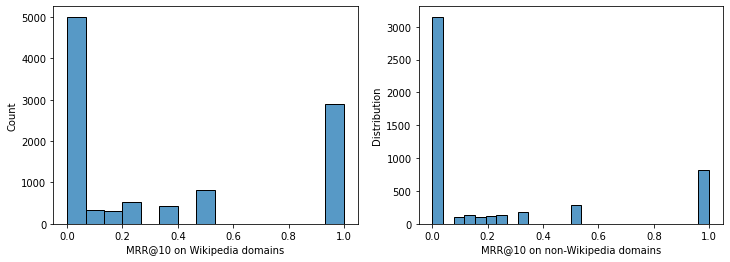

In [59]:
wiki_scores = []
non_wiki_scores = []
for query in queries_full:
    url = file_url_map[relevance_scores[query]]
    if 'wiki' in url:
        wiki_scores.append(semantic_finetune_full_mrr[query])
    else:
        non_wiki_scores.append(semantic_finetune_full_mrr[query])

plt.rcParams['figure.figsize'] = [12,4]

fig, (ax1, ax2) = plt.subplots(ncols=2)

sb.histplot(x = wiki_scores, ax=ax1)
ax1.set_xlabel('MRR@10 on Wikipedia domains')
ax2.set_ylabel('Distribution')


sb.histplot(x = non_wiki_scores, ax=ax2)
ax2.set_xlabel('MRR@10 on non-Wikipedia domains')
ax2.set_ylabel('Distribution')

fig.savefig('out/plots/wiki_nonwiki.pdf')

### Query length, MRR correlation

/home/kjros2/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kjros2/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kjros2/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

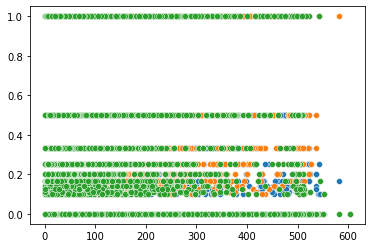

In [42]:
### Query length vs. MRR@10
lengths = {}
for query in queries_full:
    #lengths[query] = len(queries_full[query].split(' '))
    lengths[query] = len(queries_full[query].split('<C>')[-1].split(' '))

sb.scatterplot(list(lengths.values()), list(bm25_full_mrr.values()))
sb.scatterplot(list(lengths.values()), list(semantic_finetune_full_mrr.values()))
sb.scatterplot(list(lengths.values()), list(semantic_full_mrr.values()))
# Takeaway: no major visual difference


In [40]:
corr, _ = pearsonr(list(lengths.values()), list(bm25_removelast_mrr.values()))
print(corr)


-0.10757197690495472


### Statistical significance testing

In [24]:
# across settings
print('bm25')
print(ttest_rel(list(bm25_full_mrr.values()), list(bm25_removelast_mrr.values())))
print(ttest_rel(list(bm25_full_mrr.values()), list(bm25_onlylast_mrr.values())))
print(ttest_rel(list(bm25_removelast_mrr.values()), list(bm25_onlylast_mrr.values())))

print('bm25 rm3')
print(ttest_rel(list(bm25rm3_full_mrr.values()), list(bm25rm3_removelast_mrr.values())))
print(ttest_rel(list(bm25rm3_full_mrr.values()), list(bm25rm3_onlylast_mrr.values())))
print(ttest_rel(list(bm25rm3_removelast_mrr.values()), list(bm25rm3_onlylast_mrr.values())))

print('semantic')
print(ttest_rel(list(semantic_full_mrr.values()), list(semantic_removelast_mrr.values())))
print(ttest_rel(list(semantic_full_mrr.values()), list(semantic_onlylast_mrr.values())))
print(ttest_rel(list(semantic_removelast_mrr.values()), list(semantic_onlylast_mrr.values())))

print('semantic finetune')
print(ttest_rel(list(semantic_finetune_full_mrr.values()), list(semantic_finetune_removelast_mrr.values())))
print(ttest_rel(list(semantic_finetune_full_mrr.values()), list(semantic_finetune_onlylast_mrr.values())))
print(ttest_rel(list(semantic_finetune_removelast_mrr.values()), list(semantic_finetune_onlylast_mrr.values())))

print('interpolated')
print(ttest_rel(list(interpolate_full_mrr.values()), list(interpolate_onlylast_mrr.values())))
print(ttest_rel(list(interpolate_full_mrr.values()), list(interpolate_removelast_mrr.values())))
print(ttest_rel(list(interpolate_removelast_mrr.values()), list(interpolate_onlylast_mrr.values())))

# best in each setting (interpolated)
print('full')
print(ttest_rel(list(interpolate_full_mrr.values()), list(bm25_full_mrr.values())))
print(ttest_rel(list(interpolate_full_mrr.values()), list(bm25rm3_full_mrr.values())))
print(ttest_rel(list(interpolate_full_mrr.values()), list(semantic_full_mrr.values())))
print(ttest_rel(list(interpolate_full_mrr.values()), list(semantic_finetune_full_mrr.values())))
print('last')
print(ttest_rel(list(interpolate_onlylast_mrr.values()), list(bm25_onlylast_mrr.values())))
print(ttest_rel(list(interpolate_onlylast_mrr.values()), list(bm25rm3_onlylast_mrr.values())))
print(ttest_rel(list(interpolate_onlylast_mrr.values()), list(semantic_onlylast_mrr.values())))
print(ttest_rel(list(interpolate_onlylast_mrr.values()), list(semantic_finetune_onlylast_mrr.values())))
print('removelast')
print(ttest_rel(list(interpolate_removelast_mrr.values()), list(bm25_removelast_mrr.values())))
print(ttest_rel(list(interpolate_removelast_mrr.values()), list(bm25rm3_removelast_mrr.values())))
print(ttest_rel(list(interpolate_removelast_mrr.values()), list(semantic_removelast_mrr.values())))
print(ttest_rel(list(interpolate_removelast_mrr.values()), list(semantic_finetune_removelast_mrr.values())))



bm25
Ttest_relResult(statistic=58.93928192233481, pvalue=0.0)
Ttest_relResult(statistic=-9.599168938767223, pvalue=9.277405269738759e-22)
Ttest_relResult(statistic=-48.70780894169876, pvalue=0.0)
bm25 rm3
Ttest_relResult(statistic=54.94927748852135, pvalue=0.0)
Ttest_relResult(statistic=-10.792010435310118, pvalue=4.696059991417465e-27)
Ttest_relResult(statistic=-50.014428134942904, pvalue=0.0)
semantic
Ttest_relResult(statistic=48.14425495748813, pvalue=0.0)
Ttest_relResult(statistic=-1.6517177422198095, pvalue=0.09861256779250331)
Ttest_relResult(statistic=-37.95369661234372, pvalue=2.342188706985002e-301)
semantic finetune
Ttest_relResult(statistic=63.9565002549924, pvalue=0.0)
Ttest_relResult(statistic=13.954893729506693, pvalue=5.455141719216298e-44)
Ttest_relResult(statistic=-50.099542753388754, pvalue=0.0)
interpolated
Ttest_relResult(statistic=10.80382177759671, pvalue=4.133317091262602e-27)
Ttest_relResult(statistic=56.6330466148522, pvalue=0.0)
Ttest_relResult(statistic=-48.7

<AxesSubplot:ylabel='Count'>

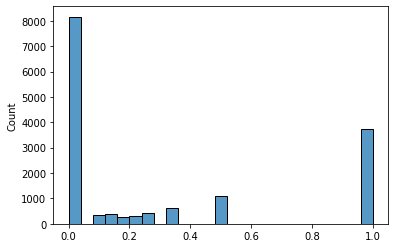

In [11]:
x = list(semantic_finetune_full_mrr.values())
#y = list(semantic_removelast_mrr.values())
#z = [x[i] - y[i] for i in range(len(x))]

sb.histplot(x)


<AxesSubplot:ylabel='Count'>

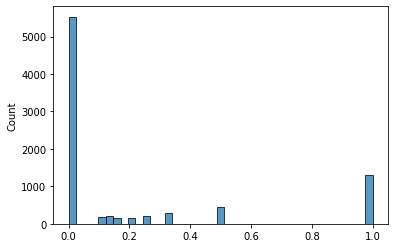

In [6]:
x = list(semantic_finetune_full_mrr.values())
y = list(bm25_full_mrr.values())
z = [x[i] - y[i] for i in range(len(x)) if y[i] == 0]

sb.histplot(z)

In [15]:
def load_webpage_text(name):
    webpage = json.load(open('data_2017-09/webpages/' + name + '.json', 'r'))
    return webpage['contents'][:500]

In [19]:
def find_differences(relevance_scores, run1, run2):
    infirst = []
    insecond = []
    inboth = []
    for query_id in run1:
        ground_truth = relevance_scores[query_id]
        if ground_truth in run1[query_id] and ground_truth not in run2[query_id]:
            infirst.append(query_id)
        if ground_truth in run2[query_id] and ground_truth not in run1[query_id]:
            insecond.append(query_id)
        if ground_truth in run1[query_id] and ground_truth in run2[query_id]:
            inboth.append(query_id)
    all_found = set(infirst).union(set(insecond)).union(set(inboth))
    missing = list(set(list(run1.keys())).difference(all_found))
    return infirst, insecond, missing, inboth
        

In [44]:
#inbm25, insemanticfinetune, missing = find_differences(relevance_scores, bm25_full, semantic_finetune_full)

inbm25, insemanticfinetune, missing, inboth = find_differences(relevance_scores, bm25_removelast, semantic_finetune_removelast)
len(inbm25) + len(insemanticfinetune) + len(missing)

13958

Observations of full missed by both bm25 and semantic finetune (missing[:10])

1. '54110' --> BLM description / debate. even though missed still relevant. bm25 --> news articles about police and protests. semantic finetune --> wikipedia pages about individuals shot by police officers. 
2. '31481' --> about computer memory. Both returned somewhat relevant wiki pages. but induced demand is missed, possibly because the last comment is the url alone
3. '9643' --> cows and visions and colors. semantic finetune way off with mad cow disease. but bm25 gives color blindness and vision test examples. Many results with fragments. Likely artificially decreases scores, especially with wikipedia. More preprocessing needed.
4. '150732' --> trump wiretap. all results about wiretap. interestingly, they are all news articles. Top may be missed because a bit of irrelevant meta text at top of article. More preprocessing needed
5. '47250' --> trump exec actions but talking about veteren stuff. Mentioned in passing and a long comment. Difficult to recognize as a human that the url was there. 
6. '62920' --> england and countries. bm25 takes it literally and finds country wikipedia. semantic finetune finds articles based on urls already in comments (e.g.,Montevideo_Convention )

In [21]:
inboth[:10]

['119', '1120', '1291', '2312', '2418', '2571', '2572', '2686', '2698', '2837']

Observations of proactive missed by both bm25 and semantic finetune

In [46]:
# for the remove last setting

inboth_lengths = []
missing_lengths = []
for query in inboth:
    inboth_lengths.append(lengths[query])
for query in missing:
    missing_lengths.append(lengths[query])
print(sum(inboth_lengths) / len(inboth_lengths))
print(sum(missing_lengths) / len(missing_lengths))

55.94560357675112
107.61278231619414


In [30]:
query_id = '2837'
print('Query: ',queries_full[query_id])
print(file_url_map[relevance_scores[query_id]], relevance_scores[query_id])
print('\t', load_webpage_text(relevance_scores[query_id]))
#print('Run: ', semantic_finetune_full[query_id], '\n')
for x in semantic_finetune_full[query_id]:
    print(file_url_map[x],x)
    print('\t', load_webpage_text(x))

Query:  You might also find it interesting that pigeons produce milk! Both sexes, even! It's called crop milk. <C> isn't it called fight milk <C>

https://en.wikipedia.org/wiki/Crop_milk 0c594a950580451489075dca3a6aa63d
	 A greater flamingo chick in Zoo Basel is fed crop milkCrop milk is a secretion from the lining of the crop of parent birds that is regurgitated to young birds. It is found among all pigeons and doves where it is referred to as pigeon milk. An analog to crop milk is also secreted from the esophagus of flamingos and the male emperor penguin.[1][2][3]Crop milk bears little physical resemblance to mammalian milk. Crop milk is a semi-solid substance somewhat like pale yellow cottage cheese. It is ext
https://en.wikipedia.org/wiki/Crop_milk 0c594a950580451489075dca3a6aa63d
	 A greater flamingo chick in Zoo Basel is fed crop milkCrop milk is a secretion from the lining of the crop of parent birds that is regurgitated to young birds. It is found among all pigeons and doves wh